In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projectCheckPoint.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,subreddit,post_id,sentence_range,text,id,label
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1


In [ ]:
df.drop(['subreddit', 'post_id','sentence_range','id'], inplace=True, axis=1)

In [ ]:
df.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


# **Data Preprocessing**

```
*   removing Hashtag, Mention, URLs
*   text lowercase
*   stemming
*   lemmatizing
*   removing Punctuations
*   removing stopwords
*   sub of emojis
```














In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.6 MB/s 


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import demoji
import string

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stopwords.words('english')
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
STOPWORDS = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')
lemmatizer=WordNetLemmatizer()


def clean_text(text):
    
    #removing Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())
    
    #make all text lowercase
    text = text.lower() 

    #stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    #lemmatizing
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    
    #removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)
    
    #removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
    # sub of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [ ]:
df['cleaned_text'] = df['text'].apply(lambda text: clean_text(text))

In [ ]:
df.head(30)

,text,label,cleaned_text
0,"He said he had not felt that way before, sugge...",1,said felt way sugget go rest trigger ahead you...
1,"Hey there r/assistance, Not sure if this is th...",0,hey rassistance sure right place post goe im c...
2,My mom then hit me with the newspaper and it s...,1,mom hit newspap shock would know dont like pla...
3,"until i met my new boyfriend, he is amazing, h...",1,met new boyfriend amazing kind sweet good stud...
4,October is Domestic Violence Awareness Month a...,1,octob domest violenc awar month domest violenc...
5,I think he doesn't want to put in the effort f...,1,think doesnt want put effort relationship work...
6,It was a big company so luckily I didn't have ...,0,wa big compani luckili didnt see time act thou...
7,It cleared up and I was okay but. On Monday ...,1,clear wa okay monday wa think human brain work...
8,I actually give an assistant half my emergency...,1,actual give assist half emerg fee come help so...
9,I just feel like the street life has fucked my...,1,feel like street life ha fuck head much dont e...


# **Preprocessed Information**

In [ ]:
df.isnull()

,text,label,cleaned_text
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3548,False,False,False
3549,False,False,False
3550,False,False,False
3551,False,False,False


In [ ]:
df['cleaned_text'].duplicated().sum()

24

In [ ]:
df.drop_duplicates("cleaned_text", inplace = True)

In [ ]:
df['label'].value_counts()

1    1848
0    1681
Name: label, dtype: int64

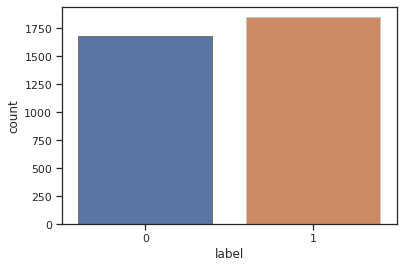

In [ ]:
sns.set_theme(style="ticks")
sns.countplot(data = df, x = 'label', edgecolor=sns.color_palette("RdGy_r", 5))

In [ ]:
features = df['cleaned_text']
labels = df['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train)) 
print(lsvc.score(features_test, labels_test))
y_pred = lsvc.predict(features_test)
print ("Loss")

0.9819341126461212
0.7195467422096318
Loss


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7194026255570276
0.7195467422096318
0.7194926984649052
[0.71304348 0.72576177]
0.7257617728531855


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7193700635715661
0.7195467422096318
0.7195467422096318
[0.70689655 0.73184358]
[0.70689655 0.73184358]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7195392326971275
0.7195467422096318
0.7195426461119021
[0.71929825 0.71978022]
[0.71929825 0.71978022]


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
print(gnb.score(features_train, labels_train))  
print(gnb.score(features_test, labels_test))
y_pred = gnb.predict(features_test)

0.9273822174991144
0.5920679886685553


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.5900116144018583
0.5920679886685553
0.5904228892551977
[0.56097561 0.61904762]
0.6190476190476191


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.5911834585500546
0.5920679886685553
0.5920679886685553
[0.52873563 0.65363128]
[0.52873563 0.65363128]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.5926711479475298
0.5920679886685553
0.592604130249866
[0.5974026 0.5879397]
[0.5974026 0.5879397]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(features_train, labels_train)
print(mnb.score(features_train, labels_train))  
print(mnb.score(features_test, labels_test))
y_pred = mnb.predict(features_test)

0.8554729011689692
0.7039660056657224


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.6889743281669269
0.7039660056657224
0.6899415331668493
[0.62068966 0.757259  ]
0.7572590011614402


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7009969177422462
0.7039660056657224
0.7039660056657224
[0.49137931 0.91061453]
[0.49137931 0.91061453]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7452379320138283
0.7039660056657224
0.7438622011355581
[0.84236453 0.64811133]
[0.84236453 0.64811133]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))  
print(lr.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.8880623450230252
0.7436260623229461


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7434773269737647
0.743626062322946
0.7435648183556361
[0.73730044 0.74965422]
0.7496542185338865


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.743434148847364
0.7436260623229461
0.7436260623229461
[0.72988506 0.75698324]
[0.72988506 0.75698324]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7436668943076367
0.7436260623229461
0.7436498809806822
[0.74486804 0.74246575]
[0.74486804 0.74246575]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train)) 
print(rfc.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9879560750974141
0.6841359773371105


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7434773269737647
0.743626062322946
0.7435648183556361
[0.73730044 0.74965422]
0.7496542185338865


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.743434148847364
0.7436260623229461
0.7436260623229461
[0.72988506 0.75698324]
[0.72988506 0.75698324]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7436668943076367
0.7436260623229461
0.7436498809806822
[0.74486804 0.74246575]
[0.74486804 0.74246575]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(features_train, labels_train)
print(clf.score(features_test, labels_test))
y_pred = clf.predict(features_test)

0.6813031161473088


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.6812513168323785
0.6813031161473088
0.6811937620380115
[0.68531469 0.67718795]
0.6771879483500717


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.6816204328003596
0.6813031161473088
0.6813031161473088
[0.70402299 0.65921788]
[0.70402299 0.65921788]


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.681870061810261
0.6813031161473088
0.6820725424041725
[0.66757493 0.69616519]
[0.66757493 0.69616519]


# **TF-IDF + LOGISTIC REGRESSION (GRID SEARCH CROSS VALIDATION)**




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       322
           1       0.77      0.80      0.79       384

    accuracy                           0.76       706
   macro avg       0.76      0.76      0.76       706
weighted avg       0.76      0.76      0.76       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


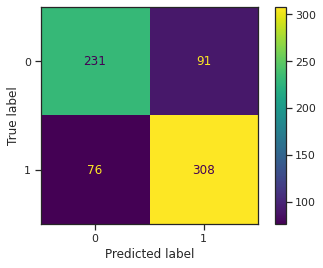

In [ ]:
# LOGISTIC REGRESSION
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
log_model = LogisticRegression(solver = 'saga')
param_grid = {'C': np.logspace(0, 10, 5)}
grid_log_model = HalvingGridSearchCV(log_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_log_model.fit(X_train_tfidf, y_train)
preds_grid_log_model = grid_log_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_log_model))
plot_confusion_matrix(grid_log_model, X_test_tfidf, y_test)

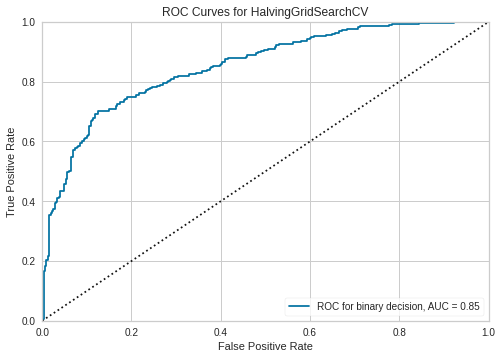

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd505ca12d0>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=LogisticRegression(solver='saga'),
                                     n_jobs=-1,
                                     param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10])}),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_log_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# **Bag Of Words + Logistic Regression(GRID SEARCH Cross Validation)**

In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       322
           1       0.75      0.80      0.77       384

    accuracy                           0.75       706
   macro avg       0.75      0.74      0.74       706
weighted avg       0.75      0.75      0.75       706



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


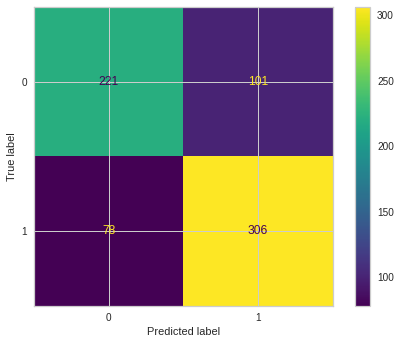

In [ ]:
# Logistic Regression

logR_model = LogisticRegression(solver = 'saga')
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_logR_model = HalvingGridSearchCV(logR_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_logR_model.fit(X_train_bow, y_train)
preds_grid_logR_model = grid_logR_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_logR_model))
plot_confusion_matrix(grid_logR_model, X_test_bow, y_test)

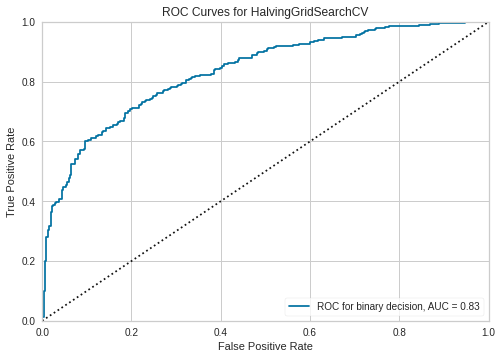

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(grid_logR_model, classes=["0", "1"], binary="TRUE")

visualizer.fit(X_train_bow, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_bow, y_test)        # Evaluate the model on the test data
visualizer.show() 

# **TF-IDF + LINEAR SVC(GRID SEARCH Cross Validation)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       322
           1       0.76      0.77      0.76       384

    accuracy                           0.74       706
   macro avg       0.74      0.74      0.74       706
weighted avg       0.74      0.74      0.74       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


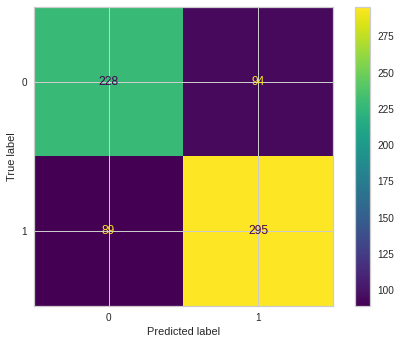

In [ ]:
# SUPPORT VECTOR MACHINES

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

svm_model_tf_idf = LinearSVC()
param_grid = {'C': np.logspace(0, 10, 5)}
grid_svm_model_tf_idf = HalvingGridSearchCV(svm_model_tf_idf, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model_tf_idf.fit(X_train_tfidf, y_train)
preds_grid_svm_model = grid_svm_model_tf_idf.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_svm_model))
plot_confusion_matrix(grid_svm_model_tf_idf, X_test_tfidf, y_test)

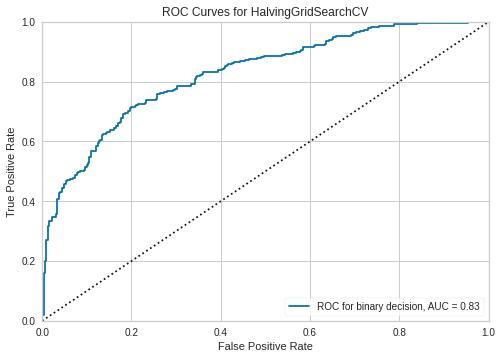

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5085e9d10>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=LinearSVC(), n_jobs=-1,
                                     param_grid={'C': array([1.00000000e+00, 3.16227766e+02, 1.00000000e+05, 3.16227766e+07,
       1.00000000e+10])}),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_svm_model_tf_idf, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# **Bag Of Words + LINEAR SVC(GRID SEARCH Cross Validation)**


In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       322
           1       0.76      0.78      0.77       384

    accuracy                           0.75       706
   macro avg       0.74      0.74      0.74       706
weighted avg       0.75      0.75      0.75       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


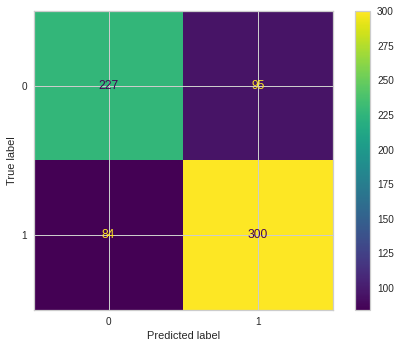

In [ ]:
# SUPPORT VECTOR MACHINES

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_bow, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_svm_model))
plot_confusion_matrix(grid_svm_model, X_test_bow, y_test)

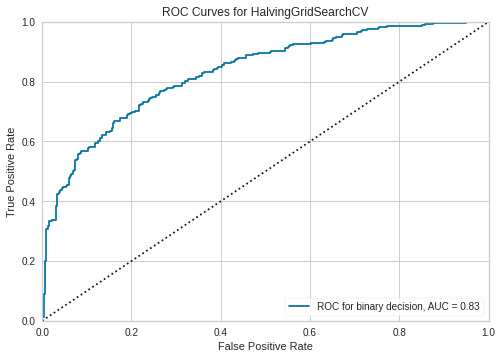

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(grid_svm_model, classes=["0", "1"], binary="TRUE")

visualizer.fit(X_train_bow, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_bow, y_test)        # Evaluate the model on the test data
visualizer.show()   

# ** TF-IDF + Random Forest(GRID SEARCH Cross Validation)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.75      0.58      0.65       322
           1       0.70      0.84      0.76       384

    accuracy                           0.72       706
   macro avg       0.72      0.71      0.71       706
weighted avg       0.72      0.72      0.71       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


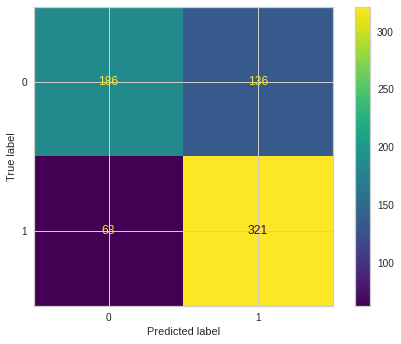

In [ ]:
# RandomForest
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

rfc_model_tf_idf = RandomForestClassifier(random_state=42)
param_grid = { 'n_estimators': [64,100,128,200]}
grid_rfc_model_tf_idf = HalvingGridSearchCV(estimator=rfc_model_tf_idf, param_grid=param_grid, cv= 5)
grid_rfc_model_tf_idf.fit(X_train_tfidf, y_train)
preds_grid_rfc_model = grid_rfc_model_tf_idf.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_rfc_model))
plot_confusion_matrix(grid_rfc_model_tf_idf, X_test_tfidf, y_test)

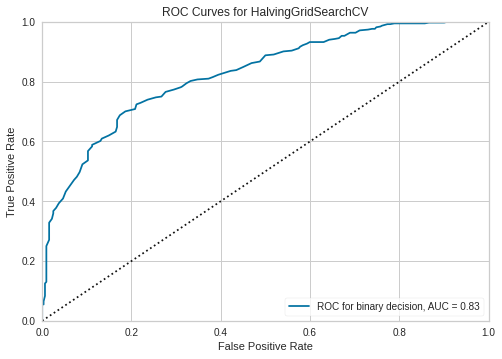

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd505886090>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                     param_grid={'n_estimators': [64, 100, 128,
                                                                  200]}),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_rfc_model_tf_idf, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# ** BOW + Random Forest(GRID SEARCH Cross Validation)**

In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

              precision    recall  f1-score   support

           0       0.76      0.61      0.67       322
           1       0.72      0.84      0.77       384

    accuracy                           0.73       706
   macro avg       0.74      0.72      0.72       706
weighted avg       0.74      0.73      0.73       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


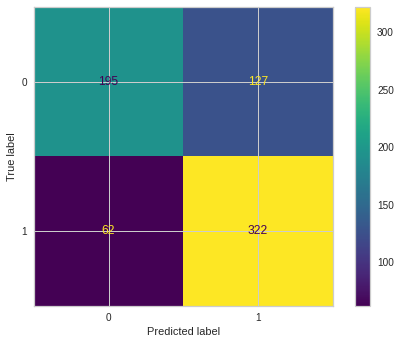

In [ ]:
# Random Forest
rfc_model = RandomForestClassifier(random_state=42)
param_grid = { 'n_estimators': [64,100,128,200]}
grid_rfc_model = HalvingGridSearchCV(estimator=rfc_model, param_grid=param_grid, cv= 5)
grid_rfc_model.fit(X_train_bow, y_train)
preds_grid_rfc_model = grid_rfc_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_rfc_model))
plot_confusion_matrix(grid_rfc_model, X_test_bow, y_test)

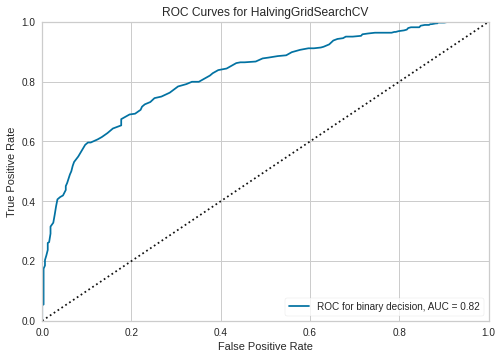

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4f01bf9d0>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                     param_grid={'n_estimators': [64, 100, 128,
                                                                  200]}),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_rfc_model, X_train_bow, y_train, X_test=X_test_bow, y_test=y_test,binary="TRUE", classes=['0', '1'])

# TF-IDF + Gradient Boosting Classifier(GRID SEARCH Cross Validation)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       322
           1       0.75      0.76      0.75       384

    accuracy                           0.73       706
   macro avg       0.73      0.73      0.73       706
weighted avg       0.73      0.73      0.73       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


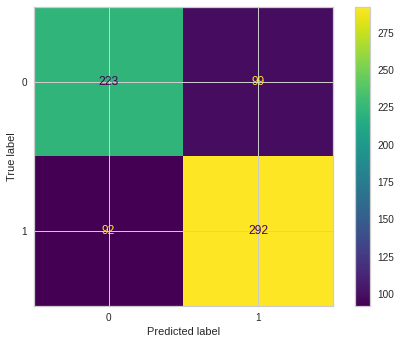

In [ ]:
# Gradient Boosting Classifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

gbc_model_tf_idf = GradientBoostingClassifier(random_state=42)
param_grid = { 'n_estimators': [64,100,128,200]}
grid_gbc_model_tf_idf = HalvingGridSearchCV(gbc_model_tf_idf, param_grid, n_jobs=5,cv = 8)
grid_gbc_model_tf_idf.fit(X_train_tfidf, y_train)
preds_grid_gbc_model = grid_gbc_model_tf_idf.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_gbc_model))
plot_confusion_matrix(grid_gbc_model_tf_idf, X_test_tfidf, y_test)

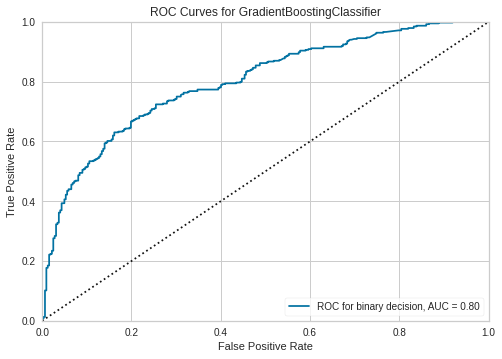

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd50566d8d0>,
       binary='TRUE', classes=['0', '1'],
       estimator=GradientBoostingClassifier(random_state=42), macro=False,
       micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(gbc_model_tf_idf, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# BOW + Gradient Boosting Classifier(GRID SEARCH Cross Validation)

In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       322
           1       0.75      0.73      0.74       384

    accuracy                           0.72       706
   macro avg       0.72      0.72      0.72       706
weighted avg       0.72      0.72      0.72       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


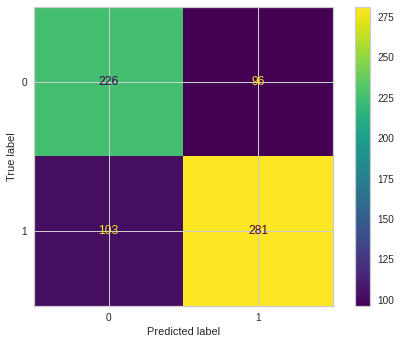

In [ ]:
# Gradient Boosting
gbc_model = GradientBoostingClassifier(random_state=42)
param_grid = { 'n_estimators': [64,100,128,200]}
grid_gbc_model = HalvingGridSearchCV(gbc_model, param_grid, n_jobs=5,cv = 8)
grid_gbc_model.fit(X_train_bow, y_train)
preds_grid_gbc_model = grid_gbc_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_gbc_model))
plot_confusion_matrix(grid_gbc_model, X_test_bow, y_test)

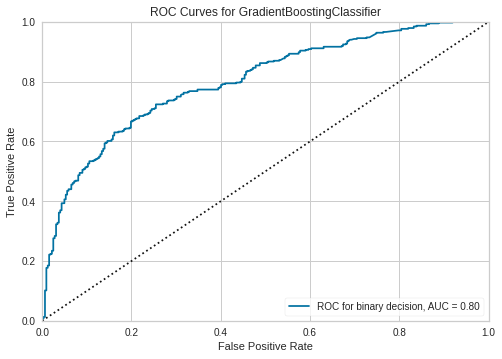

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd50465ced0>,
       binary='TRUE', classes=['0', '1'],
       estimator=GradientBoostingClassifier(random_state=42), macro=False,
       micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(gbc_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])

# TF-IDF + Extreme Gradient Boosting Classifier(GRID SEARCH Cross Validation)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X=df['cleaned_text']
Y=df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 941
max_resources_: 2823
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 941
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 2823
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.75      0.75      0.75       384

    accuracy                           0.73       706
   macro avg       0.73      0.73      0.73       706
weighted avg       0.73      0.73      0.73       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


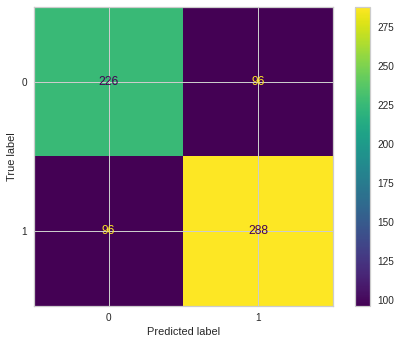

In [ ]:
xgb_clf = xgb.XGBClassifier()
param_grid = dict(n_estimators = [100,500,1000])

grid_xgb_model = HalvingGridSearchCV(xgb_clf, param_grid = param_grid, n_jobs=-1, verbose = 1)
grid_xgb_model.fit(X_train_tfidf, y_train)
preds_grid_xgb_model = grid_xgb_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_xgb_model))
plot_confusion_matrix(grid_xgb_model, X_test_tfidf, y_test)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(xgb_clf, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test, classes=['0', '1'])

XGBoostError: ignored

# BOW + Extreme Gradient Boosting Classifier(GRID SEARCH Cross Validation)

In [ ]:
vectorizer = CountVectorizer().fit(X_train)

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 941
max_resources_: 2823
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 3
n_resources: 941
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 1
n_candidates: 1
n_resources: 2823
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       322
           1       0.75      0.77      0.76       384

    accuracy                           0.74       706
   macro avg       0.74      0.74      0.74       706
weighted avg       0.74      0.74      0.74       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


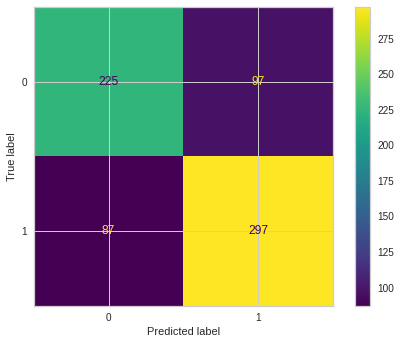

In [ ]:
xgb_clf = xgb.XGBClassifier()
param_grid = dict(n_estimators = [100,500,1000])

grid_xgb_model = HalvingGridSearchCV(xgb_clf, param_grid = param_grid, n_jobs=-1, verbose = 1)
grid_xgb_model.fit(X_train_bow, y_train)
preds_grid_xgb_model = grid_xgb_model.predict(X_test_bow)
print(classification_report(y_test, preds_grid_xgb_model))
plot_confusion_matrix(grid_xgb_model, X_test_bow, y_test)

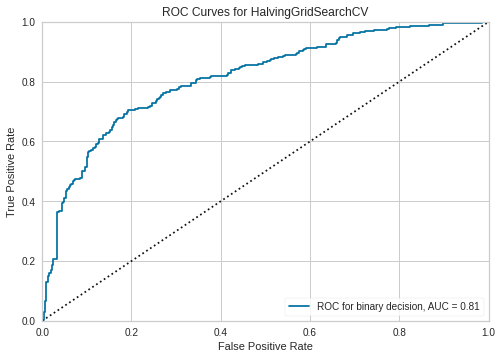

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4f00fd750>,
       binary='TRUE', classes=['0', '1'],
       estimator=HalvingGridSearchCV(estimator=XGBClassifier(), n_jobs=-1,
                                     param_grid={'n_estimators': [100, 500,
                                                                  1000]},
                                     verbose=1),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(grid_xgb_model, X_train_bow, y_train, X_test=X_test_bow, y_test=y_test,binary="TRUE", classes=['0', '1'])

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       322
           1       0.70      0.69      0.70       384

    accuracy                           0.67       706
   macro avg       0.67      0.67      0.67       706
weighted avg       0.67      0.67      0.67       706



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


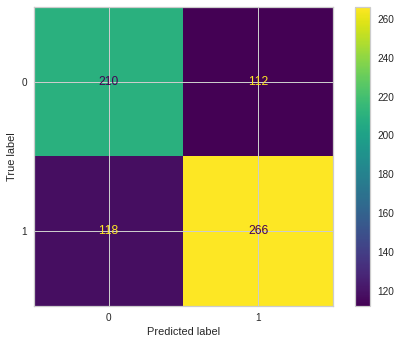

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=600, learning_rate = 1.5, random_state = 42)
adaboost_model.fit(X_train_tfidf, y_train)
preds_grid_adaboost_model = adaboost_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_adaboost_model))
plot_confusion_matrix(adaboost_model, X_test_tfidf, y_test)

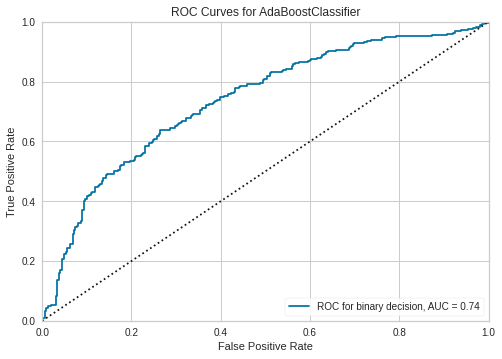

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4f0094950>,
       binary='TRUE', classes=['0', '1'],
       estimator=AdaBoostClassifier(learning_rate=1.5, n_estimators=600,
                                    random_state=42),
       macro=False, micro=False, per_class=False)

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc
# Instantiate the visualizer with the classification model
roc_auc(adaboost_model, X_train_tfidf, y_train, X_test=X_test_tfidf, y_test=y_test,binary="TRUE", classes=['0', '1'])